<a href="https://colab.research.google.com/github/Machine-Learning-for-Finance/Machine-Learning-Algorithms/blob/master/01-Data%20Loading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt

# Loading From Google Drive

In [2]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    base_location = "/content/drive/My Drive/data/"
except:
    base_location = "/data/FannieMae/"

In [3]:
!ls /content/drive/My\ Drive/data/2010Q1

ls: cannot access '/content/drive/My Drive/data/2010Q1': No such file or directory


# Financial Datasets

There are a large number of financial datasets that are available, the first one we will discuss is the Fannie Mae Fixed Rate Mortgage Dataset.

- https://www.fanniemae.com/portal/funding-the-market/data/loan-performance-data.html

- https://loanperformancedata.fanniemae.com/lppub/index.html#Portfolio

Which consists of both Acquisitions and Performance data for a collection of mortgages.

To make our lives a bit easier here are the column names pulled from the provided `R` script to load the data.  See `R` is good for at least one thing.

In [4]:
AcquisitionColumnNames = (
    "LOAN_ID", "ORIG_CHN", "Seller.Name", 
    "ORIG_RT", "ORIG_AMT", "ORIG_TRM", "ORIG_DTE",
    "FRST_DTE", "OLTV", "OCLTV", "NUM_BO", 
    "DTI", "CSCORE_B", "FTHB_FLG", "PURPOSE", 
    "PROP_TYP", "NUM_UNIT", "OCC_STAT", "STATE", "ZIP_3", 
    "MI_PCT", "Product.Type", "CSCORE_C", "MI_TYPE", 
    "RELOCATION_FLG"
)

PerformanceColumnNames = (
    "LOAN_ID", "Monthly.Rpt.Prd", "Servicer.Name", 
    "LAST_RT", "LAST_UPB", "Loan.Age", "Months.To.Legal.Mat", 
    "Adj.Month.To.Mat", "Maturity.Date", "MSA", 
    "Delq.Status", "MOD_FLAG", "Zero.Bal.Code", 
    "ZB_DTE", "LPI_DTE", "FCC_DTE","DISP_DT", 
    "FCC_COST", "PP_COST", "AR_COST", "IE_COST", 
    "TAX_COST", "NS_PROCS","CE_PROCS", "RMW_PROCS", 
    "O_PROCS", "NON_INT_UPB", "PRIN_FORG_UPB_FHFA", 
    "REPCH_FLAG", "PRIN_FORG_UPB_OTH", "TRANSFER_FLG"
)

In [5]:
# Data path will change depending on your system setup.

acquisition_data_path = f"{base_location}2010Q1/Acquisition_2010Q1.txt"

#### Loading the Acquisition Data from CSV

To load the data we call from `pandas`, `pd.read_csv` which automatically handles loading data from the csv file.  We provide column names, a notification that the file doesn't include headers, and information on what the column separator is `|` in this case.

In [6]:
acquisition_df = pd.read_csv(
    acquisition_data_path,
    names=AcquisitionColumnNames,
    header=None,
    sep="|"
)

In [7]:
acquisition_df.columns

Index(['LOAN_ID', 'ORIG_CHN', 'Seller.Name', 'ORIG_RT', 'ORIG_AMT', 'ORIG_TRM',
       'ORIG_DTE', 'FRST_DTE', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B',
       'FTHB_FLG', 'PURPOSE', 'PROP_TYP', 'NUM_UNIT', 'OCC_STAT', 'STATE',
       'ZIP_3', 'MI_PCT', 'Product.Type', 'CSCORE_C', 'MI_TYPE',
       'RELOCATION_FLG'],
      dtype='object')

#### Loading the Performance Data

In [8]:
performance_data_path = f"{base_location}2010Q1/Performance_2010Q1.txt"

performance_df = pd.read_csv(
    performance_data_path,
    names=PerformanceColumnNames,
    header=None,
    sep="|"
)


/home/capcolabs/Stevens/Machine-Learning-Algorithms/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


First thing we note is that this takes longer than the `Acquisitions` data to load, stemming from the fact that for each loan there are multiple monthly data elements loaded.

# Data Modifying

In [9]:
DS = set(performance_df['Delq.Status'])

In [10]:
print(DS)
mapper = {}
for ds in DS:
    try:
        mapper[ds] = int(ds)
    except:
        mapper[ds] = -1

performance_df['Delq.Status'] = performance_df['Delq.Status'].map(mapper)

{nan, '78', '49', '11', '21', '12', '15', '50', '92', '94', '65', '19', '0', '71', '16', '63', '13', '26', '45', 'X', '34', '29', '14', '23', '31', '98', '44', '7', '48', '28', '60', '84', '51', '67', '69', '22', '18', '3', '6', '86', '43', '68', '47', '85', '59', '88', '80', '25', '41', '36', '52', '37', '91', '96', '1', '75', '42', '27', '79', '61', '81', '5', '20', '76', '64', '56', '46', '74', '93', '40', '32', '10', '8', '24', '82', '57', '90', '17', '77', '66', '70', '83', '38', '89', '58', '33', '99', '54', '72', '35', '9', '2', '73', '62', '87', '95', '55', '97', '53', '39', '30', '4'}


In [11]:
V, C = np.unique(performance_df['Delq.Status'], return_counts=True)
print(V)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94
 95 96 97 98 99]


# Grouping By Loan ID

https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby

In [12]:
loans = performance_df.groupby("LOAN_ID", sort=True)['Delq.Status'].max()

ID_To_Delinq = {}

for row in loans.iteritems():
    loan_id, delinq = row
    ID_To_Delinq[loan_id] = delinq

In [13]:
def mapper(row):
    return ID_To_Delinq.get(row["LOAN_ID"], -1)

acquisition_df['MAX_DELINQ'] = acquisition_df.apply(mapper, axis=1)

In [14]:
V, C = np.unique(acquisition_df['MAX_DELINQ'], return_counts=True)

# Data Loading For Model

We will first create a simple model (which will probably give poor results.

In [38]:
DEL_NOTNAN = acquisition_df["MAX_DELINQ"].notna()
df = acquisition_df[DEL_NOTNAN]
OLTV = df['OLTV'].notna()
df = df[OLTV]
CS = df['CSCORE_B'].notna()
df = df[CS]

credit_score  = np.array(df['CSCORE_B'])
loan_to_value = np.array(df['OLTV'])
max_delinq    = np.array(df['MAX_DELINQ'])

X = np.array([credit_score, loan_to_value]).transpose()
y = np.array([max_delinq]).transpose()
print(X.shape)
print(y.shape)

Total = np.hstack([X, y])
print(Total.shape)
np.random.shuffle(Total)

X = Total[:, :2]
y = Total[:, 2:]

print(X.shape)
print(y.shape)

prop = 0.8
train_num = int(prop * len(Total))
print(f"Train Number: {train_num}")

X_train, X_test = X[:train_num], X[train_num:]
y_train, y_test = y[:train_num], y[train_num:]

print(f"X_Train: {X_train.shape}")
print(f"X_Test: {X_test.shape}")
print("=="*10)
print(f"y_Train: {y_train.shape}")
print(f"y_Test:  {y_test.shape}")

(322872, 2)
(322872, 1)
(322872, 3)
(322872, 2)
(322872, 1)
Train Number: 258297
X_Train: (258297, 2)
X_Test: (64575, 2)
y_Train: (258297, 1)
y_Test:  (64575, 1)


In [22]:
V, C = np.unique(credit_score, return_counts=True)

In [23]:
V, C = np.unique(y, return_counts=True)

## Decision Tree

- https://towardsdatascience.com/what-is-a-decision-tree-22975f00f3e1

- https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

In [39]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9056445993031359


## Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)
rfc = rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))

/home/capcolabs/Stevens/Machine-Learning-Algorithms/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9041114982578398


### Feature Importance

One benefit of the Random Forest Classifier is you can get the relative importance for each of the features towards making the decision.

In [41]:
rfc.feature_importances_

array([0.73313046, 0.26686954])

# TensorFlow Model Example

In [42]:
# !pip install tensorflow-gpu
import tensorflow as tf

## Neural Network Architecture

Since we are dealing with just an input vector _Credit Score_ and _Original Loan to Value_ we will build our models with stacked dense layers. Our steps we take are 
1. Build the Dataset
2. Construct the Model
3. Compile the Model
4. Train the Model

In [46]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset  = tf.data.Dataset.from_tensor_slices((X_test, y_test))

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100
V = np.unique(y)

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset  = test_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

print(train_dataset)

<BatchDataset shapes: ((None, 2), (None, 1)), types: (tf.float64, tf.float64)>


In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=[2]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(V), activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)


In [57]:
history = model.fit(
    train_dataset, 
    validation_data=test_dataset, 
    epochs=10
)

Epoch 1/10
4036/4036 [==============================] - 12s 3ms/step - loss: nan - sparse_categorical_accuracy: 0.8920 - val_loss: nan - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/10
4036/4036 [==============================] - 11s 3ms/step - loss: nan - sparse_categorical_accuracy: 0.9105 - val_loss: nan - val_sparse_categorical_accuracy: 0.9089
Epoch 3/10
4036/4036 [==============================] - 10s 3ms/step - loss: nan - sparse_categorical_accuracy: 0.9105 - val_loss: nan - val_sparse_categorical_accuracy: 0.9089
Epoch 4/10
4036/4036 [==============================] - 10s 2ms/step - loss: nan - sparse_categorical_accuracy: 0.9105 - val_loss: nan - val_sparse_categorical_accuracy: 0.9089
Epoch 5/10
4036/4036 [==============================] - 10s 2ms/step - loss: nan - sparse_categorical_accuracy: 0.9105 - val_loss: nan - val_sparse_categorical_accuracy: 0.9089
Epoch 6/10
4036/4036 [==============================] - 10s 2ms/step - loss: nan - sparse_categorical_accuracy:

In [55]:
print(history.history)

{'loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'sparse_categorical_accuracy': [0.91047513, 0.91047513, 0.91047513, 0.91047513, 0.91047513, 0.91047513, 0.91047513, 0.91047513, 0.91047513, 0.91047513], 'val_loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'val_sparse_categorical_accuracy': [0.9088811, 0.9088811, 0.9088811, 0.9088811, 0.9088811, 0.9088811, 0.9088811, 0.9088811, 0.9088811, 0.9088811]}


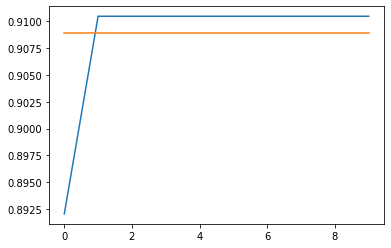

In [59]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.show()